In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipyvolume as ipv

In [3]:
import kelp_compute
import kelp_analyze
import discrete_plot

In [4]:
import sqlite3
import shutil
import os

## Analyze Grid Study

# TODO: FIX CASE WHEN P_KELP = 0 (CENTER IRRAD)

# TODO: Compare linear interpolation error to normal error when both nz values are equal.

## Whole cube

In [9]:
def cori_get_study_errors(study_name):
    base_dir = os.path.join(os.environ['SCRATCH'], 'kelp-results')
    study_dir = os.path.join(base_dir, study_name)
    db_path = os.path.join(study_dir, '{}.db'.format(study_name))
    perceived_irrad_dict, abs_err_arr, rel_err_arr, compute_time_dict = (
        kelp_analyze.grid_study_analyze_full(db_path, study_name)
    )
    
    # TODO: Do plot, not just return errors
    #return ipv.quickvolshow(abs_err_arr),
    return abs_err_arr, rel_err_arr

In [26]:
abs_err_arr, rel_err_arr = cori_get_study_errors('gs22all_top_heavy')

/global/u2/o/oevans/kelp/code/python/kelp_analyze.py:139: RuntimeWarning: invalid value encountered in true_divide
  perceived_irrad = np.sum(p_kelp*irrad, axis=(0,1)) / np.sum(p_kelp, axis=(0,1))


### Reproduce three edges plot

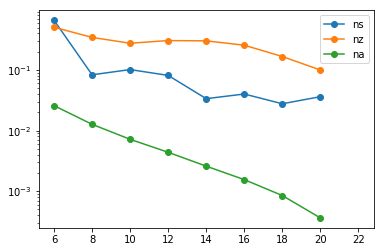

In [27]:
ns_list = nz_list = na_list = np.arange(6, 24, 2)
plt.figure()
plt.semilogy(ns_list, rel_err_arr[:,-1,-1], 'o-', label='ns')
plt.semilogy(nz_list, rel_err_arr[-1,:,-1], 'o-', label='nz')
plt.semilogy(na_list, rel_err_arr[-1,-1,:], 'o-', label='na')
plt.legend()
plt.show()

abs_err = 1.299e-01
rel_err = 3.615e-02


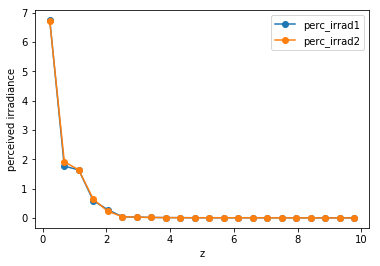

In [33]:
kelp_analyze.cori_plot_two_avg_irrads(
    'gs22all_top_heavy',
    {'ns': 22, 'nz': 22, 'na': 22},
    {'ns': 20, 'nz': 22, 'na': 22},
)
#plt.yscale('log')

### Top faces

In [ ]:
# [6, 8, 10, ..., 22]
ns_list = nz_list = na_list = np.arange(6, 24, 2)

# ns max
plt.figure()
plt.title('log rel err @ ns max')
rel_err_ns_plane = np.log10(rel_err_arr[-1,:,:])
discrete_plot.imshow_with_contours_and_zoom(
    nz_list, 
    na_list, 
    rel_err_ns_plane, 
    zoom_factor=4
)
plt.xlabel('nz')
plt.ylabel('na')
plt.show()

# nz max
plt.figure()
plt.title('log rel err @ nz max')
rel_err_nz_plane = np.log10(rel_err_arr[:,-1,:].T)
discrete_plot.imshow_with_contours_and_zoom(
    na_list, 
    ns_list, 
    rel_err_nz_plane, 
    zoom_factor=4
)
plt.xlabel('na')
plt.ylabel('ns')
plt.show()

# na max
plt.figure()
plt.title('log rel err @ na max')
rel_err_na_plane = np.log10(rel_err_arr[:,:,-1])
discrete_plot.imshow_with_contours_and_zoom(
    ns_list, 
    nz_list, 
    rel_err_na_plane, 
    zoom_factor=4
)
plt.xlabel('ns')
plt.ylabel('nz')
plt.show()

### Volume Plot + Isosurface

In [ ]:
log_rel_err_arr = np.zeros_like(rel_err_arr)
pos = (rel_err_arr > 0)
log_rel_err_arr[pos] = np.log(rel_err_arr[pos])
discrete_plot.volshow_zoom_correct_scale(
    ns_list, 
    nz_list, 
    na_list, 
    rel_err_arr, 
    zoom_factor=3
)
ipv.xlabel('ns')
ipv.ylabel('nz')
ipv.zlabel('na')

## Three edges

In [ ]:
def cori_grid_study_plot_three_edges(study_name):
    base_dir = os.path.join(os.environ['SCRATCH'], 'kelp-results')
    study_dir = os.path.join(base_dir, study_name)
    db_path = os.path.join(study_dir, '{}.db'.format(study_name))
    perceived_irrad_dict, abs_err_arr, rel_err_arr, compute_time_dict = (
        kelp_analyze.grid_study_analyze_edges(db_path, study_name)
    )
    
    conn = sqlite3.connect(db_path)
    # Assume all zmin, zmax are the same (any table row will do, so just use the first.)
    zmin = 0
    zmax = conn.execute('SELECT zmax FROM {}'.format(study_name)).fetchone()[0]
    conn.close()

    kelp_analyze.grid_study_plot(
        perceived_irrad_dict, 
        abs_err_arr, 
        rel_err_arr, 
        compute_time_dict, 
        zmin, zmax
    )

In [ ]:
cori_grid_study_plot_three_edges('gs22all_top_heavy')

In [ ]:
cori_grid_study_plot_three_edges('gs22all_bottom_heavy')

In [ ]:
cori_grid_study_plot_three_edges('gs22all_high_scatter')